In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import datasets , layers, models 
import os

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

print(tf.__version__)



from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

Using TensorFlow backend.


2.0.0


In [3]:
#load dataset 
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
#classe
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
#Etudes des données

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
#Préparation des données

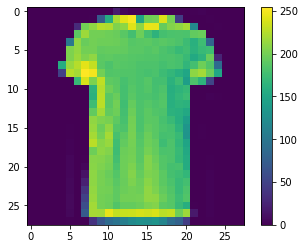

In [11]:
plt.figure()
plt.imshow(train_images[17])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
#The labels are shown above each image.

IndexError: index 5 is out of bounds for axis 0 with size 5

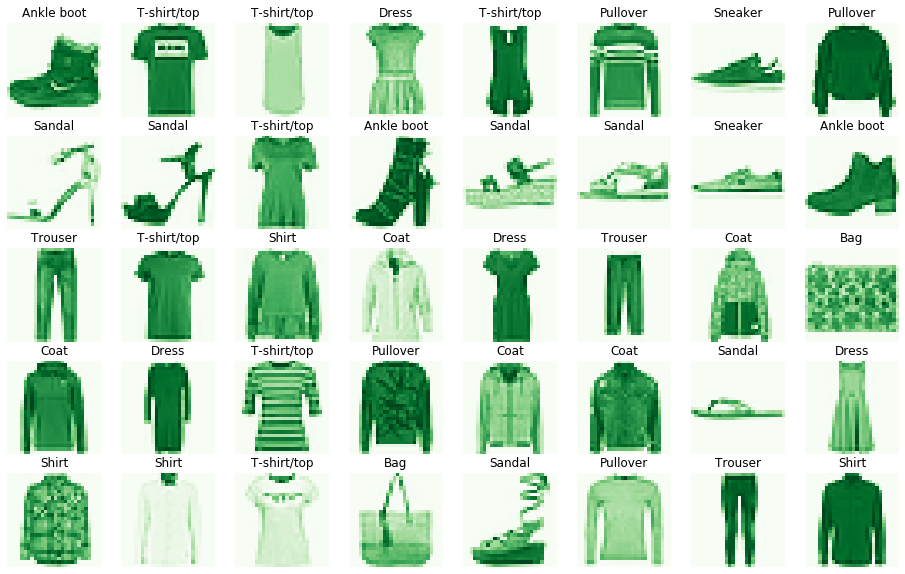

In [13]:
def plot_sample_images(train_images,train_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(train_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(class_names[train_labels[i]])
    plt.show()    
    
plot_sample_images(train_images,train_labels, "Greens")

In [14]:
#Data normalization
train_images = train_images.reshape (-1, 28,28, 1) 
test_images = test_images.reshape (-1, 28,28, 1)

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [15]:
#architecture CNN

In [16]:
model = models.Sequential()
model.add (layers.Conv2D (32, (5,5), input_shape = (28, 28, 1))) 
model.add (layers.Activation ('relu')) 
model.add (layers.MaxPooling2D (pool_size = ( 2,2))) 

#layer3
model.add (layers.Conv2D (64, (3,3))) 
model.add (layers.Activation ('relu')) 
model.add (layers.MaxPooling2D (pool_size = (2,2))) 

model.add (layers.Flatten ()) 
model.add (layers.Dense (256)) 
model.add (layers.Dense (10)) 
model.add (layers.Activation ('softmax'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
activation (Activation)      (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 10, 10, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [18]:
#Compiler et former le modèle
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history=model.fit(train_images,train_labels,epochs=10,verbose=1,validation_data=(test_images, test_labels))
                

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
21408/60000 [=========>....................] - ETA: 1:27 - loss: 0.5247 - accuracy: 0.8117

In [ ]:
# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

In [ ]:
model.save("best.h5")

In [ ]:
#Create a Confusion Matrix

In [ ]:
y_pred=model.predict_classes(test_images)
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()

In [ ]:
 
classes=[0,1,2,3,4,5,6,7,8,9]
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
con_mat_df = pd.DataFrame(con_mat_norm,index =classes,columns =classes)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print(test_labels[:5]) 

In [ ]:
test_images = tf.reshape(test_images,[28,28])
plt.figure()
plt.imshow(test_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plot_value_array(8, predictions, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()